## Projeto de Disciplina - Validação de modelos de clusterização [25E4_3]
### Aluna: Rosana Ribeiro Lima

O código e demais artefatos deste projeto se encontram disponibilizados em https://github.com/roriblim/PD-validacao-clusterizacao

Além disso, o resultado das músicas clusterizadas de forma interativa pode ser visualizado em: https://roriblim.github.io/PD-validacao-clusterizacao/src/tsne_clusters.html

### Parte 1 - Infraestrutura

O projeto foi desenvolvido dentro de um ambiente virtual Python 3.12, criado por meio do Anaconda versão 25.5.1. As bibliotecas e dependências encontram-se no requirements.txt, que foi criado a partir do requirements.in. Mais detalhes sobre a configuração feita e sobre como o ambiente foi montado encontram-se no README do projeto Github mencionado acima.

- Captura de tela do ambiente rodando na minha máquina:

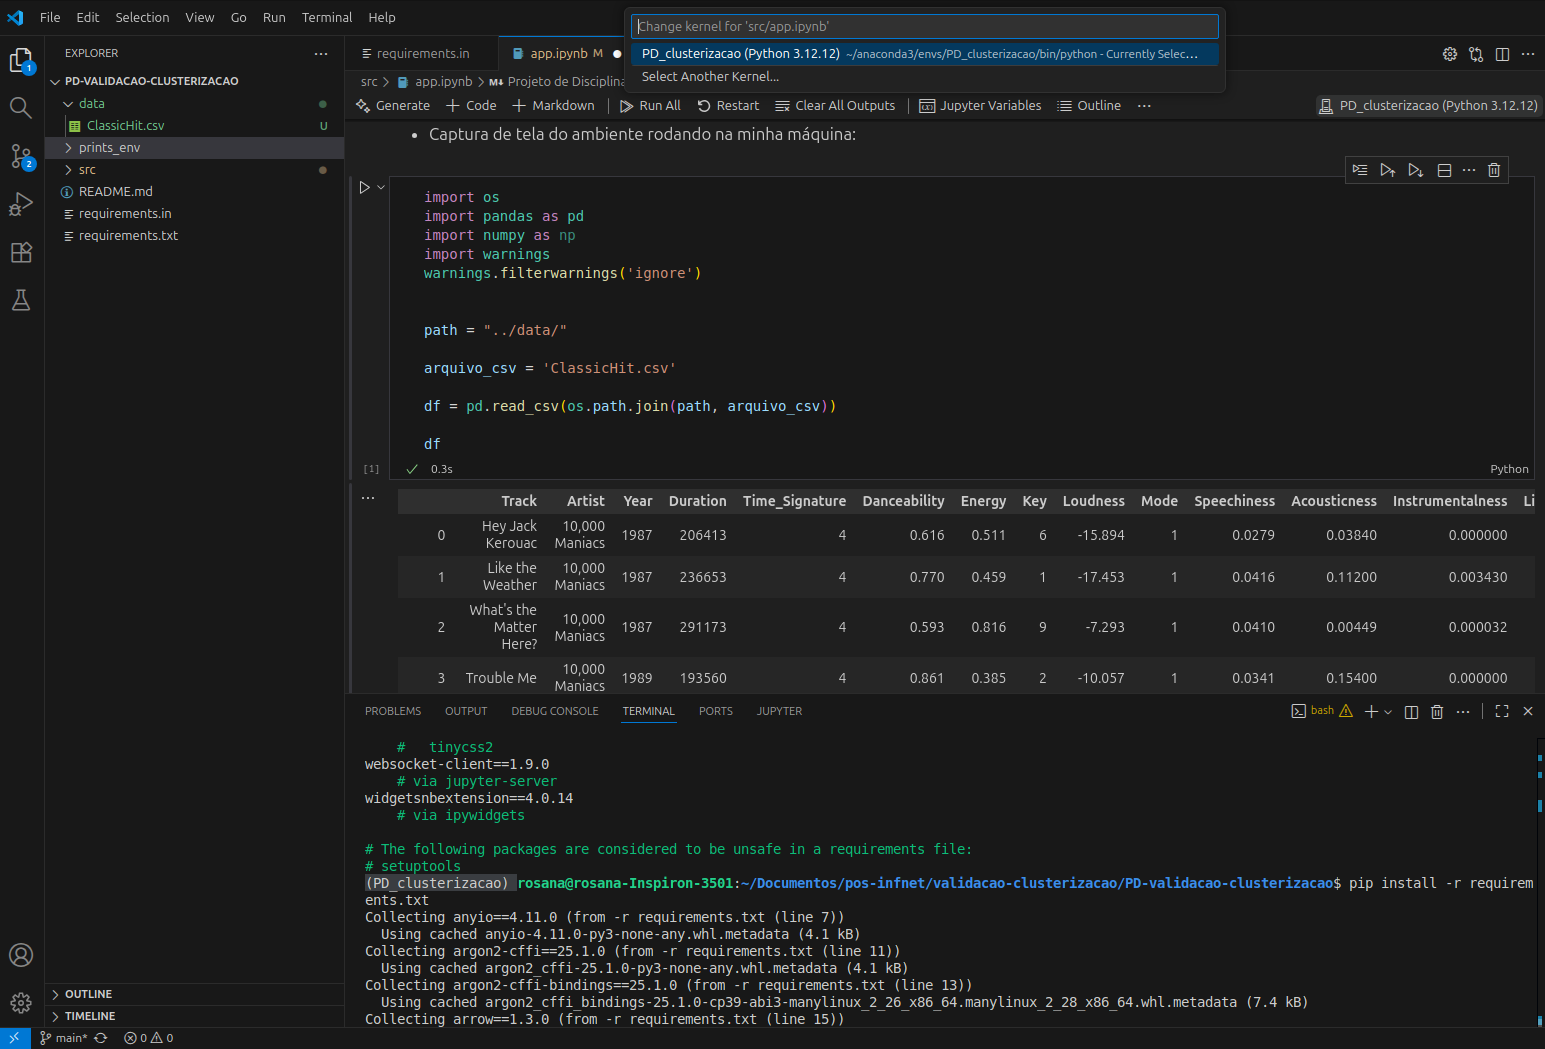

### Parte 2 - Base de dados

#### 2.1 Escolha da base de dados

A base escolhida é uma base do Kaggle com dados técnicos de cerca de 15000 músicas do Spotify: https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023

In [147]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


path = "../data/"

arquivo_csv = 'ClassicHit.csv'

df = pd.read_csv(os.path.join(path, arquivo_csv))

df

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,7 Seconds (feat. Neneh Cherry),Youssou N'Dour,1994,306226,4,0.679,0.659,1,-10.826,0,0.0269,0.07710,0.000004,0.3160,0.528,154.171,47,World
15146,Birima,Youssou N'Dour,1995,228373,4,0.692,0.737,10,-7.042,1,0.0512,0.25400,0.017400,0.1120,0.808,105.754,18,World
15147,Set,Youssou N'Dour,2004,226826,4,0.733,0.730,0,-11.056,1,0.0479,0.04240,0.000101,0.0282,0.840,146.213,25,World
15148,Africa Remembers,Youssou N'Dour,2007,560466,4,0.696,0.378,5,-16.181,0,0.0797,0.44400,0.019400,0.0850,0.551,97.677,8,World


#### 2.2 Justificativa para a escolha: Motivação e Objetivos

A base de dados escolhida para realizar este trabalho é uma base com dados técnicos de cerca de 15000 músicas do Spotify. 
Para a escolha da base foram levados em consideração três fatores:

1 - Potencial de gerar resultados de clusterização com valor prático. No caso, por meio da clusterização das músicas, é possível por exemplo: identificar perfis musicais de usuáruis, encontrar músicas semelhantes ou do mesmo cluster de uma música específica, além de possivelmente criar playlists de forma automática;

2 - Dados com alta qualidade técnica. Na base escolhida, tem-se uma quantidade considerável de dados (15000 músicas), e para cada uma tem-se dados numéricos contínuos úteis para a clusterização, como: energia, instrumentabilidade, dançabilidade, valência, volume, entre outros. Essas variáveis têm natureza quantitativa e comparável, o que é especialmente adequado para algoritmos de clusterização como K-means, DBSCAN, e clustering hierárquico. Além disso, o fato de serem características técnicas — e não meramente categóricas ou subjetivas — reduz ruído e aumenta a robustez dos agrupamentos.

3 - Complexidade adequada. A combinação entre o número de entradas no dataset e a variedade de atributos permite explorar decisões importantes em clusterização, como: normalização, seleção e interpretação de variáveis, ajuste de hiperparâmetros (exemplo: eps e min_samples no DBSCAN), e comparação entre diferentes algoritmos.



#### 2.3 Faixa dinâmica das variáveis e Pré-Processamento inicial

O tratamento inicial dos dados antes da clusterização consistirá das seguintes etapas:

2.3.1 - **análise do dataset, quantidade e tipos das variáveis**;

2.3.2 - **remoção de dados nulos e/ou repetidos, se houver**;

2.3.3 - **escolha das variáveis para a clusterização (análise de correlação e uso de PCA, se necessário)**;

2.3.4 - **plot da distribuição de cada variável a ser utilizada na clusterização (por meio de boxplot e histograma contínuo)**;

2.3.5 - **escalonamento dos dados**.

Cada um deles será abordado de forma mais detalhada a seguir.


##### 2.3.1 Análise do dataset, quantidade e tipos das variáveis

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

In [149]:
df.shape

(15150, 18)

In [150]:
df.describe()

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,15150.000000,1.515000e+04,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000
mean,1984.709769,2.413028e+05,3.921650,0.574667,0.617691,5.257624,-9.154545,0.696634,0.075791,0.302651,0.091046,0.200062,0.571146,120.664078,43.025809
std,19.482460,1.057966e+05,0.348322,0.166208,0.239527,3.569713,4.289558,0.459727,0.077704,0.317793,0.229075,0.175196,0.250969,29.181107,20.788038
min,1899.000000,2.300000e+04,0.000000,0.000000,0.000098,0.000000,-47.359000,0.000000,0.000000,0.000001,0.000000,0.012400,0.000000,0.000000,0.000000
25%,1971.000000,1.803700e+05,4.000000,0.461000,0.442000,2.000000,-11.736750,0.000000,0.034325,0.024225,0.000000,0.091900,0.371000,98.672500,28.000000
50%,1983.000000,2.228525e+05,4.000000,0.582000,0.644000,5.000000,-8.480500,1.000000,0.046400,0.167000,0.000084,0.130000,0.586000,118.777000,44.000000
75%,1998.000000,2.751530e+05,4.000000,0.696000,0.819000,8.000000,-5.955500,1.000000,0.078400,0.557000,0.012400,0.257000,0.782000,138.073250,59.000000
max,2024.000000,3.060650e+06,5.000000,0.988000,0.999000,11.000000,0.919000,1.000000,0.950000,0.996000,0.987000,0.996000,0.989000,219.973000,98.000000


In [151]:
df[df.duplicated(keep=False)]

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
3639,Happy Now,Zedd,2019,207029,3,0.503,0.741,4,-5.128,1,0.047,0.579,0.000001,0.0712,0.458,88.335,63,EDM
3640,Happy Now,Zedd,2019,207029,3,0.503,0.741,4,-5.128,1,0.047,0.579,0.000001,0.0712,0.458,88.335,63,EDM


##### 2.3.2 Remoção de dados nulos e/ou repetidos

Como foi possível verificar na análise do item 2.3.1, não há itens nulos no dataset (o df.info() mostrou que tem-se 15150 dados no total, que bate exatamente com a contagem de dados não-nulos de cada atributo).

No entanto, ainda conforme o item 2.3.1, foi possível identificar um dado duplicado, correspondente aos ids 3639 e 3640. Assim, apenas uma dessas duplicatas deve ser mantida:

In [152]:
df = df.drop_duplicates()
df.shape

(15149, 18)

Agora, se verificarmos novamente se há dados duplicados, não encontraremos:

In [153]:
df[df.duplicated(keep=False)]

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre


##### 2.3.3 Escolha das variáveis para a clusterização

De início, já vamos descartar algumas variáveis que não serão interessantes para a análise:

- Track, Artist, Genre: pois queremos variáveis com dados numéricos para a análise.
- Year, Popularity: pois queremos dados mais técnicos referentes à musicalidade em si.
- Mode, Key, Time_Signature, Duration: dados que não interferem tanto no gosto musical. No caso do "Mode", o Modo maior tende a soar mais feliz, mas a Valência já captura esse dado de forma mais precisa.

In [154]:
df_clust = df.drop(columns=['Track', 'Artist', 'Genre', 'Year', 'Popularity', 'Mode', 'Key', 'Time_Signature', 'Duration'])
df_clust

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.616,0.511,-15.894,0.0279,0.03840,0.000000,0.1500,0.604,132.015
1,0.770,0.459,-17.453,0.0416,0.11200,0.003430,0.1450,0.963,133.351
2,0.593,0.816,-7.293,0.0410,0.00449,0.000032,0.0896,0.519,99.978
3,0.861,0.385,-10.057,0.0341,0.15400,0.000000,0.1230,0.494,117.913
4,0.622,0.876,-6.310,0.0305,0.01930,0.006840,0.0987,0.867,104.970
...,...,...,...,...,...,...,...,...,...
15145,0.679,0.659,-10.826,0.0269,0.07710,0.000004,0.3160,0.528,154.171
15146,0.692,0.737,-7.042,0.0512,0.25400,0.017400,0.1120,0.808,105.754
15147,0.733,0.730,-11.056,0.0479,0.04240,0.000101,0.0282,0.840,146.213
15148,0.696,0.378,-16.181,0.0797,0.44400,0.019400,0.0850,0.551,97.677


Agora, podemos procurar identificar, dentre as variáveis restantes, se existem variáveis altamente correlacionadas (nesse caso, poderíamos utilizar apenas uma delas):

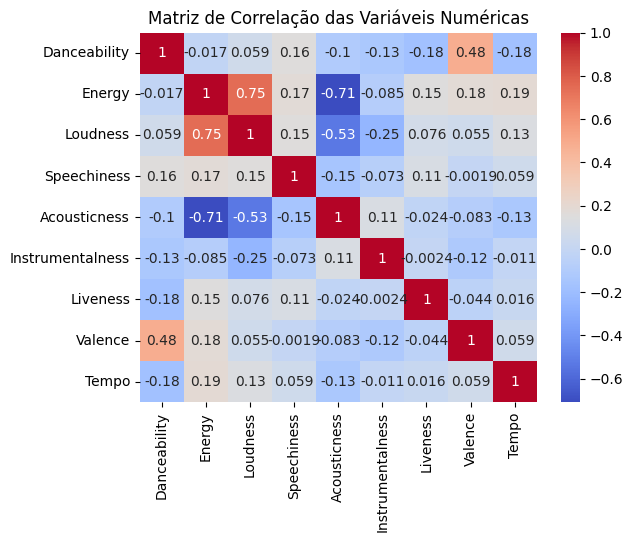


Pares com alta correlação (|corr| >= 0.7):


,Variavel_1,Variavel_2,Correlacao
8,Energy,Loudness,0.745855
10,Energy,Acousticness,-0.708695


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlação
corr = df_clust.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

# Encontrar pares altamente correlacionados
# threshold: |correlação| >= 0.7
threshold = 0.7

corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) 
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Variavel_1', 'Variavel_2', 'Correlacao']

high_corr = corr_pairs[abs(corr_pairs['Correlacao']) >= threshold]
print("\nPares com alta correlação (|corr| >= 0.7):")
display(high_corr)


Analisando os dados, é possível observar que os dados em geral apresentam informações significativas, sem muita correlação. Todavia, uma alta correlação pôde ser observada em alguns pares de dados, a saber: Energia e Loudness (Volume / Intensidade Sonora); Energia e Acusticidade. Apesar de alta, essa correlação ainda é abaixo de 80%, então se descartada alguma dessas colunas, corre-se o risco de perder dados importantes e significativos. 

Então serão mantidas essas colunas:



In [156]:
clust_cols = df_clust.columns
clust_cols

Index(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
      dtype='object')

##### 2.3.4 Plot de distribuição das variáveis a serem utilizadas na clusterização

Agora vamos então plotar a distribuição dessas variáveis:

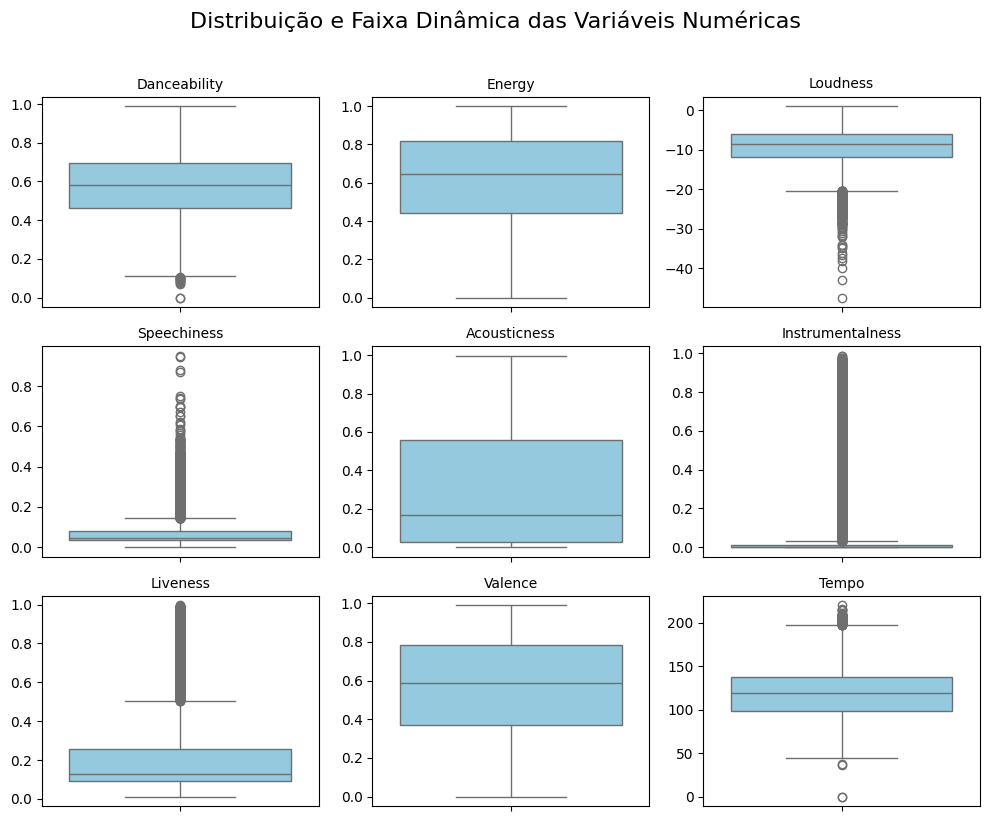

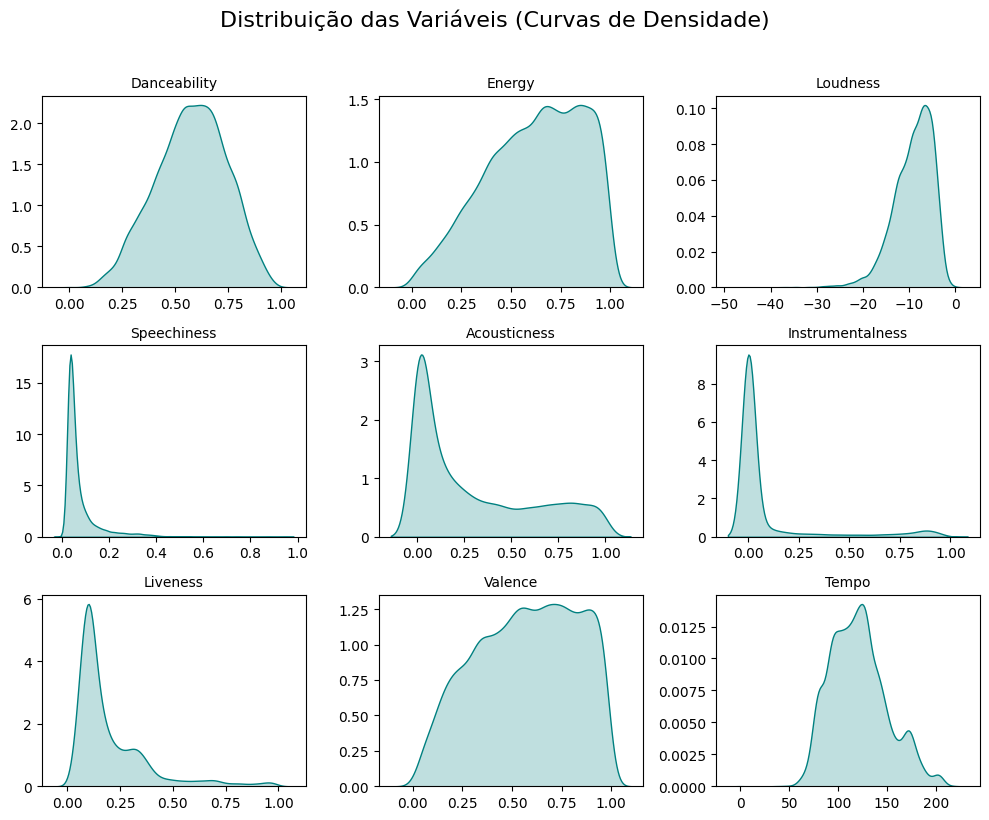

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- BOXPLOTS (verticais em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição e Faixa Dinâmica das Variáveis Numéricas", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.boxplot(y=df_clust[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis (Curvas de Densidade)", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.kdeplot(df_clust[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

Observa-se que muitas dessas variáveis possuem dados bem distribuídos ao longo de sua faixa. No caso, não queremos descartar nenhum outlier, pois nesse dataset em questão, os dados que aparentam ser outliers também contém informações importantes sobre as músicas. Então vamos utilizar o StandardScaler para escalonar os dados sem perder as informações dos outliers.



##### 2.3.5 Escalonamento dos dados

In [158]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_scaled = df_clust.copy()
df_scaled[clust_cols] = scaler.fit_transform(df[clust_cols])

df_scaled

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.248656,-0.445394,-1.571114,-0.616348,-0.831481,-0.397481,-0.285804,0.130880,0.388925
1,1.175210,-0.662491,-1.934565,-0.440037,-0.599878,-0.382507,-0.314344,1.561344,0.434709
2,0.110275,0.827959,0.434046,-0.447759,-0.938188,-0.397342,-0.630567,-0.207809,-0.708988
3,1.722718,-0.971435,-0.210328,-0.536558,-0.467713,-0.397481,-0.439920,-0.307424,-0.094353
4,0.284756,1.078454,0.663214,-0.582888,-0.891584,-0.367621,-0.578624,1.178824,-0.537911
...,...,...,...,...,...,...,...,...,...
15145,0.627701,0.172495,-0.389606,-0.629218,-0.709700,-0.397463,0.661723,-0.171948,1.148214
15146,0.705916,0.498139,0.492562,-0.316491,-0.153035,-0.321523,-0.502708,0.943734,-0.511044
15147,0.952596,0.468915,-0.443226,-0.358960,-0.818893,-0.397040,-0.981038,1.071240,0.875492
15148,0.729983,-1.000660,-1.638023,0.050287,0.444853,-0.312792,-0.656823,-0.080303,-0.787843


A nova distribuição após o escalonamento dos dados então fica assim:

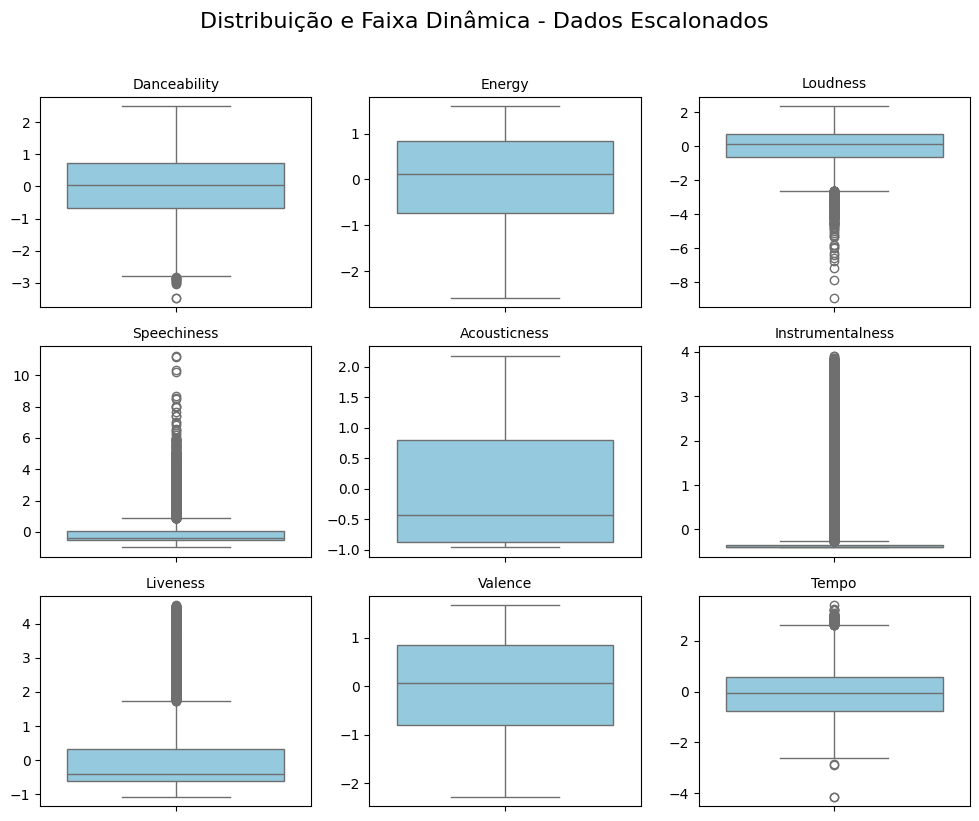

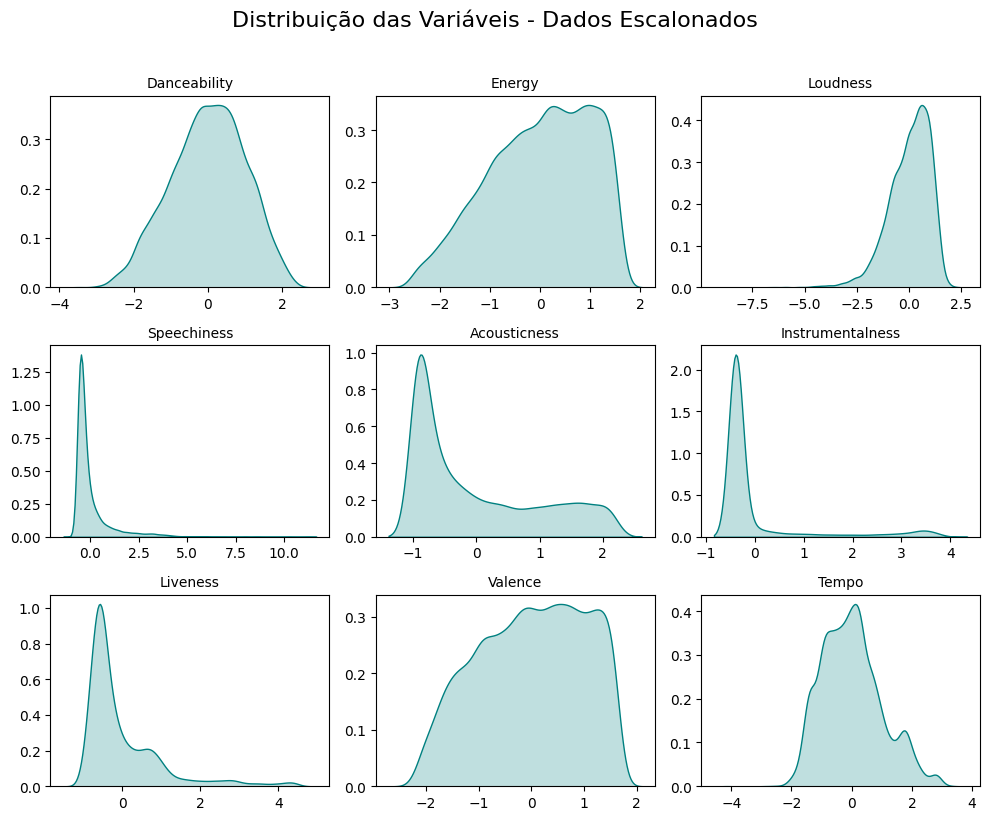

In [159]:
# --- BOXPLOTS (verticais em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição e Faixa Dinâmica - Dados Escalonados", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.boxplot(y=df_scaled[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis - Dados Escalonados", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.kdeplot(df_scaled[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

In [160]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(df_scaled)


#### Para visualização

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, perplexity=35, random_state=42)
tsne_emb = tsne.fit_transform(df_scaled)

df_plot = pd.DataFrame({
    "TSNE1": tsne_emb[:,0],
    "TSNE2": tsne_emb[:,1],
    "Cluster": labels,
    "Musica": df["Track"] + " - " + df["Artist"]
})

fig = px.scatter(
    df_plot,
    x="TSNE1",
    y="TSNE2",
    color="Cluster",
    hover_name="Musica",
    color_continuous_scale="Turbo",
    title="Músicas clusterizadas com K-Means - visualização interativa via t-SNE"
)

fig.update_layout(height=900, width=1400)
fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.show()

# Gerar HTML e adicionar rodapé com referências
html = fig.to_html(full_html=True, include_plotlyjs='cdn')

footer_html = """
<div style="font-size:14px; margin:20px 0 40px 0; padding-top:10px; border-top:1px solid #e1e1e1;">
  <strong>Fonte dos dados:</strong>
  <a href="https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023" target="_blank" rel="noopener">Kaggle — 10400 Classic Hits (10 genres)</a>
  <br>
  <strong>Projeto:</strong>
  <a href="https://github.com/roriblim/PD-validacao-clusterizacao" target="_blank" rel="noopener">GitHub — PD-validacao-clusterizacao</a>
</div>
"""

parts = html.rsplit("</body>", 1)
if len(parts) == 2:
    html_with_footer = parts[0] + footer_html + "</body>" + parts[1]
else:
    html_with_footer = html + footer_html

with open("tsne_clusters.html", "w", encoding="utf-8") as f:
    f.write(html_with_footer)
